In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import mannwhitneyu

# Opções gerais necessárias:

pd.options.display.float_format = "{:,.2f}".format

In [2]:
# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Criando indices dos sexos para utilização posterior:
sexo = {1: 'M', 2: 'F'}

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

In [3]:
# Leitura da tabela de dados separados por setores da TI:
RAIS_2022 = pd.read_csv("C:/Users/victo/2022/estagio/estagio/data/raw/DATA_RAIS_GERAL_2022.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_2022.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE', 'Escolaridade após 2005':'Escolaridade',
                            'Raça Cor':'Raça', 'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [4]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2022
fator_correcao_inflacao_2022 = 1.06951750

RAIS_2022["Remuneração"] = RAIS_2022["Remuneração"] * fator_correcao_inflacao_2022

In [5]:
# Exibindo os cinco primeiros dados:
RAIS_2022.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,317110,82997,1,42,8,"2,363.73",1
1,MS,212420,47113,1,30,2,"3,385.09",1
2,MS,212415,47440,3,38,8,"5,347.59",1
3,MS,212315,38114,4,57,8,"6,135.89",1
4,MS,212315,38114,4,40,8,"3,831.76",1


In [6]:
# Filtrando os dados em tabelas separadas pada sexo masculino e feminino:
RAIS_2022_masculino = RAIS_2022.query("Sexo == 1")
RAIS_2022_feminino = RAIS_2022.query("Sexo == 2")

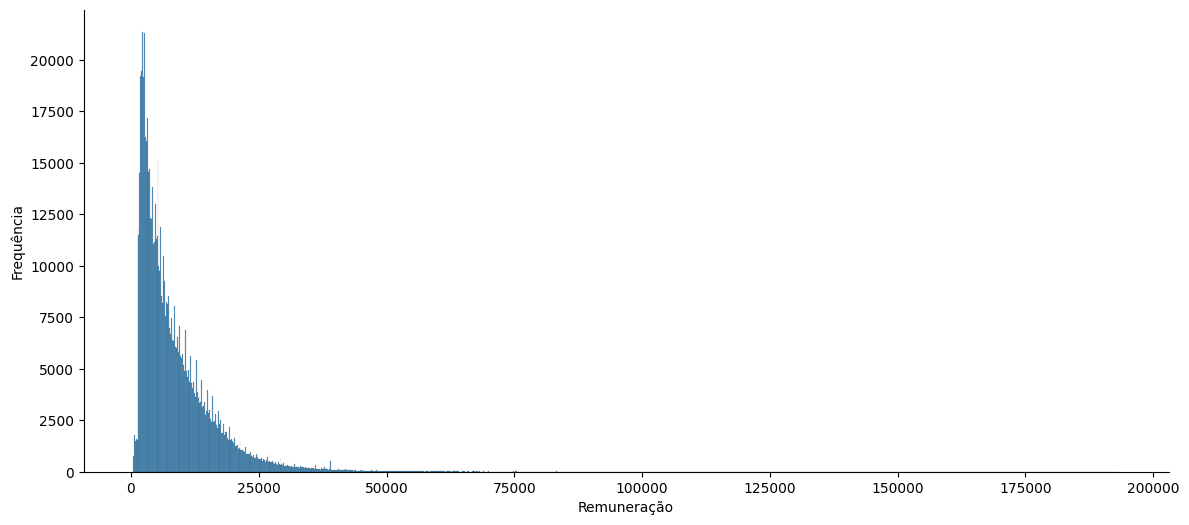

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)

hist = sns.histplot(RAIS_2022.Remuneração)
sns.despine()
hist.set_ylabel('Frequência')

fig.savefig("C:/Users/victo/2022/estagio/estagio/data/figures/hist_remuneracao_geral_2022.svg")

In [8]:
print("Soma dos salários dos trabalhadores 1% mais ricos: {}".format(RAIS_2022.Remuneração[RAIS_2022.Remuneração > RAIS_2022.Remuneração.quantile(0.99)].sum()))
print("Quantidade de trabalhadores 1% mais ricos: {}".format(RAIS_2022.Remuneração[RAIS_2022.Remuneração > RAIS_2022.Remuneração.quantile(0.99)].count()))
print()

print("Soma dos salários dos trabalhadores 27,9% mais pobres, aproximadamente: {}".format(RAIS_2022.Remuneração[RAIS_2022.Remuneração < RAIS_2022.Remuneração.quantile(0.2793)].sum()))
print("Quantidade de trabalhadores 27,9% mais pobres: {}".format(RAIS_2022.Remuneração[RAIS_2022.Remuneração < RAIS_2022.Remuneração.quantile(0.2793)].count()))

Soma dos salários dos trabalhadores 1% mais ricos: 431945746.74671566
Quantidade de trabalhadores 1% mais ricos: 7900

Soma dos salários dos trabalhadores 27,9% mais pobres, aproximadamente: 527379730.3508636
Quantidade de trabalhadores 27,9% mais pobres: 220622


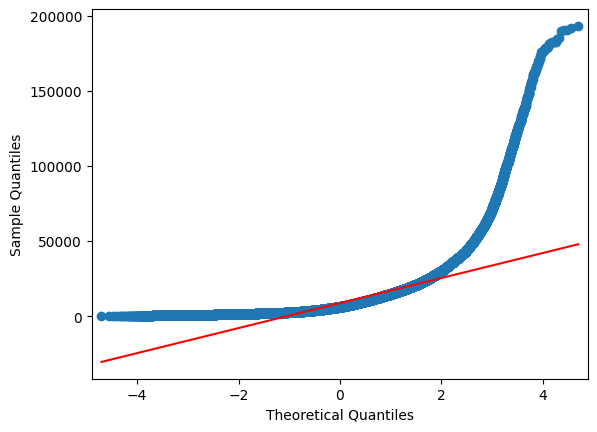

In [9]:
qqplot(RAIS_2022.Remuneração, line='s')
plt.show()

In [10]:
# Realização do teste de Shapiro considerando o nível de confiança de 0.01:

stat, p_valor = shapiro(RAIS_2022.sample(5000).Remuneração)
print('Estatística Shapiro = {:.5f}, p-valor = {:.5f}'.format(stat, p_valor))

if p_valor > nivel_confianca:
    print('A amostra parece ser Gaussiana (falha ao rejeitar H0)')
else:
    print('A amostra não parece ser Gaussiana (rejeitar H0)')

Estatística Shapiro = 0.78221, p-valor = 0.00000
A amostra não parece ser Gaussiana (rejeitar H0)


In [11]:
# Realização do teste de normalidade:

stat, p_valor = normaltest(RAIS_2022.Remuneração)
print('Estatística = {:.5f}, p-valor = {:.5f}'.format(stat, p_valor))

if p_valor > nivel_confianca:
    print('A amostra parece ser Gaussiana (falha ao rejeitar H0)')
else:
    print('A amostra não parece ser Gaussiana (rejeitar H0)')

Estatística = 693452.58228, p-valor = 0.00000
A amostra não parece ser Gaussiana (rejeitar H0)


In [12]:
# Pegando a quantidade de homens e mulheres nos dados:

qnt_masculino = RAIS_2022_masculino.Remuneração.count()
qnt_feminino = RAIS_2022_feminino.Remuneração.count()

print("Quantidade trabalhadores masculinos: {}.\n" \
      "Quantidade trabalhadores femininos: {}.\n" \
      "São aproximadamente {:.2f} mais homens que mulheres.".format(qnt_masculino, qnt_feminino, qnt_masculino / qnt_feminino))

Quantidade trabalhadores masculinos: 612032.
Quantidade trabalhadores femininos: 177892.
São aproximadamente 3.44 mais homens que mulheres.


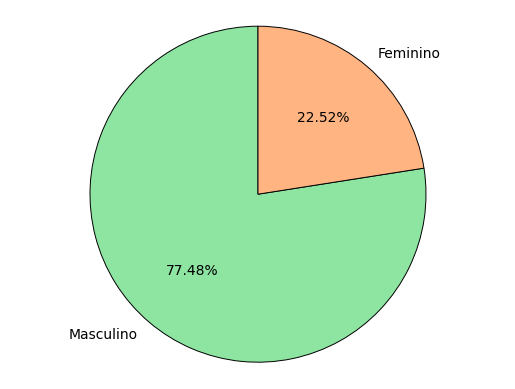

In [13]:
freq_fig, freq_ax = plt.subplots()
freq_ax.pie([qnt_masculino, qnt_feminino], labels = ("Masculino", "Feminino"), 
            autopct = '%1.2f%%', startangle = 90, colors = (color_masc, color_fem),
            wedgeprops={"edgecolor":"0",'linewidth': 0.7, 'antialiased': True})
freq_ax.axis('equal')

freq_fig.savefig("C:/Users/victo/2022/estagio/estagio/data/figures/svg/qnt_sexo_pie_geral_2022.svg")

In [14]:
# Pegando a massa salarial de homens e mulheres nos dados:

massa_salarial_masculino = RAIS_2022_masculino.Remuneração.sum()
massa_salarial_feminino = RAIS_2022_feminino.Remuneração.sum()

print("Massa salarial trabalhadores masculinos: {:.2f}.\n" \
      "Massa salarial trabalhadores femininos: {:.2f}.\n" \
      "A massa salarial dos homens é {:.2f} vezes maior que das mulheres.".format(massa_salarial_masculino, massa_salarial_feminino, massa_salarial_masculino / massa_salarial_feminino))

Massa salarial trabalhadores masculinos: 5521162972.24.
Massa salarial trabalhadores femininos: 1357494615.43.
A massa salarial dos homens é 4.07 vezes maior que das mulheres.


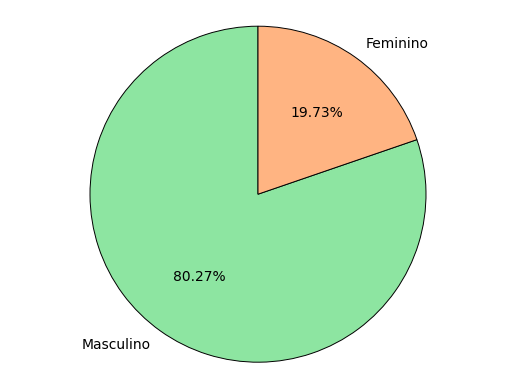

In [15]:

freq_fig, freq_ax = plt.subplots()
freq_ax.pie([massa_salarial_masculino, massa_salarial_feminino], labels = ("Masculino", "Feminino"), 
            autopct = '%1.2f%%', startangle = 90, colors = (color_masc, color_fem),
            wedgeprops={"edgecolor":"0",'linewidth': 0.7, 'antialiased': True})
freq_ax.axis('equal')

freq_fig.savefig("C:/Users/victo/2022/estagio/estagio/data/figures/svg/massa_sexo_pie_geral_2022.svg")

C:\Users\victo\AppData\Local\Temp\ipykernel_10776\2968823468.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  RAIS_2022["Sexo"].replace(sexo, inplace = True)
C:\Users\victo\AppData\Local\Temp\ipykernel_10776\2968823468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(x = 'Remuneração', y = 'Sexo', data = RAIS_2022, orient = 'h',


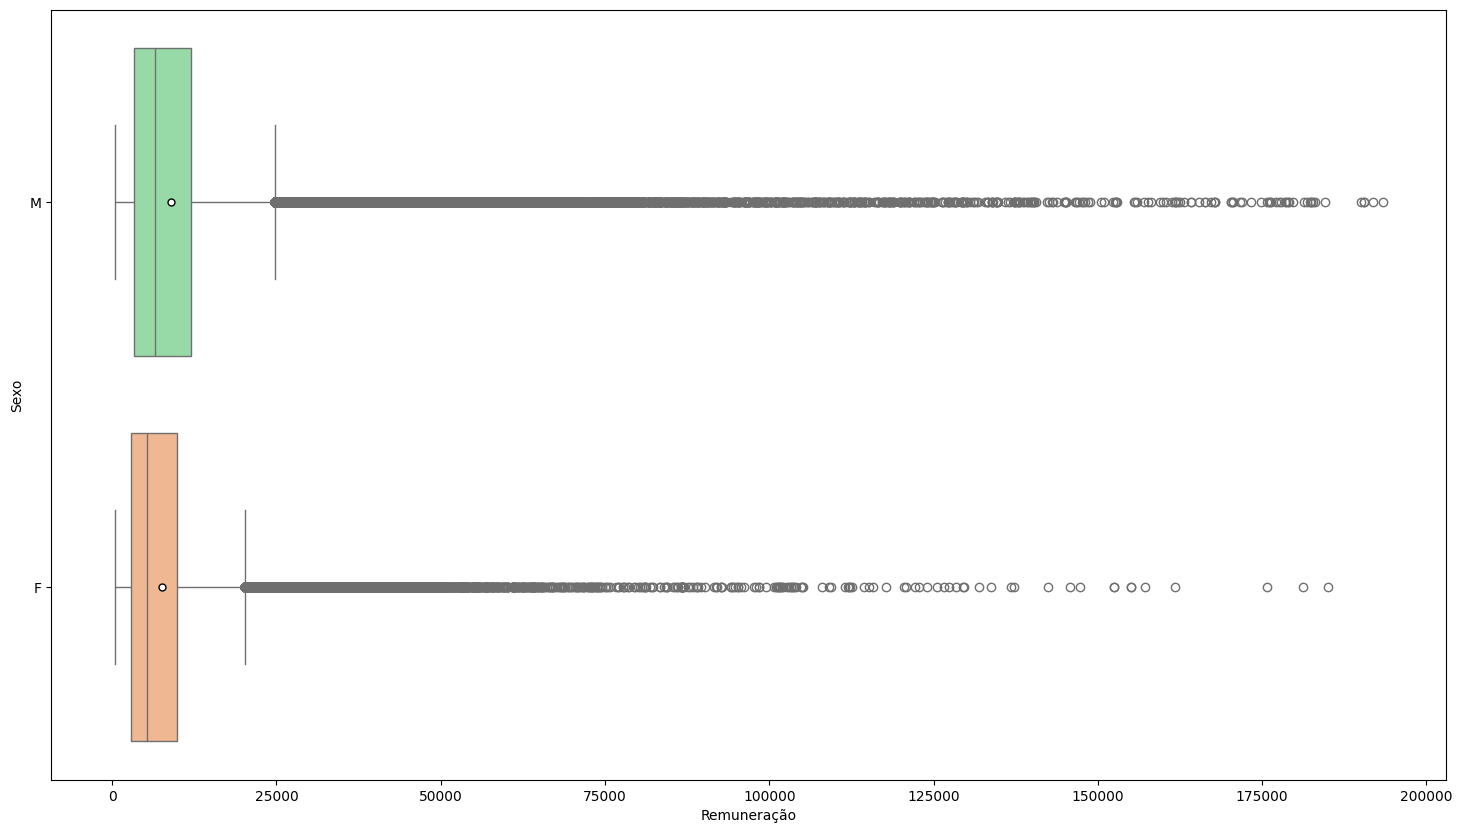

In [16]:
RAIS_2022["Sexo"].replace(sexo, inplace = True)

box = sns.boxplot(x = 'Remuneração', y = 'Sexo', data = RAIS_2022, orient = 'h', 
                  showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", 
                  "markeredgecolor":"black", "markersize":"5"},
                  palette = {"M": color_masc, "F": color_fem})
box.figure.set_size_inches(18, 10)

box.figure.savefig("C:/Users/victo/2022/estagio/estagio/data/figures/png/boxplot_geral_2022.png", dpi = 300)

In [17]:
# Capturando as médias e medianas

media_masculino = RAIS_2022_masculino.Remuneração.mean()
mediana_masculino = RAIS_2022_masculino.Remuneração.median()

media_feminino = RAIS_2022_feminino.Remuneração.mean()
mediana_feminino = RAIS_2022_feminino.Remuneração.median()

# Exibindo os dados: 

print("Masculino:")
print("Média das remunerações: R$ {:.2f}\n" \
      "Mediana das remunerações: R$ {:.2f}".format(media_masculino, mediana_masculino))

print()

print("Feminino:")
print("Média das remunerações: R$ {:.2f}\n" \
      "Mediana das remunerações: R$ {:.2f}".format(media_feminino, mediana_feminino))

print()

# Tirando os percentuais de diferença:

dif_salarial_media = media_masculino - media_feminino
taxa_dif_media = ((media_feminino - media_masculino) / media_masculino) * 100

dif_salarial_mediana = mediana_masculino - mediana_feminino
taxa_dif_mediana = ((mediana_feminino - mediana_masculino) / mediana_masculino) * 100

print("Diferença salarial média: R$ {:.2f}\n" \
      "Variação percentual média: {:.2f} %\n".format(dif_salarial_media, taxa_dif_media))

print("Diferença salarial mediana: R$ {:.2f}\n" \
      "Variação percentual mediana: {:.2f} %".format(dif_salarial_mediana, taxa_dif_mediana))

Masculino:
Média das remunerações: R$ 9021.04
Mediana das remunerações: R$ 6471.65

Feminino:
Média das remunerações: R$ 7631.00
Mediana das remunerações: R$ 5371.32

Diferença salarial média: R$ 1390.03
Variação percentual média: -15.41 %

Diferença salarial mediana: R$ 1100.33
Variação percentual mediana: -17.00 %


In [18]:
stat, p_valor = mannwhitneyu(RAIS_2022_feminino.Remuneração, RAIS_2022_masculino.Remuneração, alternative = 'less')

print("Estatística Mann-Whitney = {:.2f}, p-valor = {:.15f}".format(stat, p_valor))

if p_valor <= nivel_confianca:
    print('A mediana salarial das mulheres é menor que a mediana dos homens (rejeitar H0)')
else:
    print('As medianas não são diferentes (falha ao rejeitar H0)')

Estatística Mann-Whitney = 48152310343.50, p-valor = 0.000000000000000
A mediana salarial das mulheres é menor que a mediana dos homens (rejeitar H0)
